## HW12
Austin Placinto
I have neither given nor received any unauthorized aid in completing this work, nor have I presented someone else's work as my own.

In [0]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [0]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top = False,
                  input_shape=(150, 150, 3))

In [0]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# Directories
base_dir = '/gdrive/My Drive/vcc19sm2'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 1

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150, 150),
      batch_size=batch_size,
      class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
      features_batch = conv_base.predict(inputs_batch)
      features[i * batch_size : (i + 1) * batch_size] = features_batch
      labels[i * batch_size : (i + 1) * batch_size] = labels_batch
      i+=1
      if i >= sample_count:
        break
  return features, labels

train_features, train_labels = extract_features(train_dir, 120)
validation_features, validation_labels = extract_features(validation_dir, 30)
test_features, test_labels = extract_features(test_dir, 20)

Found 120 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [0]:
train_features = np.reshape(train_features, (120, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (30, 4 * 4 * 512))
test_features = np.reshape(test_features, (20, 4 * 4 * 512))

In [0]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=10,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 120 samples, validate on 30 samples
Epoch 1/10
120/120 [==============================] - 1s 5ms/step - loss: 0.6821 - acc: 0.5583 - val_loss: 0.5326 - val_acc: 0.7333
Epoch 2/10
120/120 [==============================] - 0s 1ms/step - loss: 0.5829 - acc: 0.6833 - val_loss: 0.4387 - val_acc: 0.9333
Epoch 3/10
120/120 [==============================] - 0s 1ms/step - loss: 0.5181 - acc: 0.7417 - val_loss: 0.3754 - val_acc: 0.9667
Epoch 4/10
120/120 [==============================] - 0s 1ms/step - loss: 0.3848 - acc: 0.9167 - val_loss: 0.3256 - val_acc: 1.0000
Epoch 5/10
120/120 [==============================] - 0s 1ms/step - loss: 0.3894 - acc: 0.8583 - val_loss: 0.2841 - val_acc: 1.0000
Epoch 6/10
120/120 [==============================] - 0s 1ms/step - loss: 0.3045 

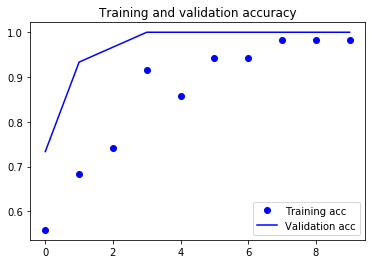

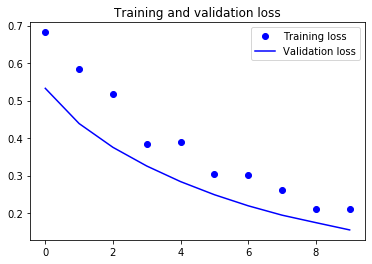

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model.save('/gdrive/My Drive/Colab Notebooks/h5s/Circle_Or_Not.h5')

In [0]:
test_loss, test_acc = model.evaluate(test_features, test_labels)
test_acc

20/20 [==============================] - 0s 440us/step


1.0